<br>

<h1>
    <center>
        Estimating $\pi$ using Various Methods
    </center>
</h1>

## Table of Contents


0. [Define Problem](#0.-Define-Problem)
1. [Import Libraries](#1.-Import-Libraries)
2. [Estimate $\pi$ using Taylor Series Expansion](#2.-Estimate-$\pi$-using-Taylor-Series-Expansion) 
    * 2.1 Define Functions
        * GenerateTaylorSeries
    * 2.2 Perform Computations
    * 2.3 Construct Records DataFrame
3. [Estimate $\pi$ using Monte Carlo Simulation with Numpy (NumpyMC)](#3.-Estimate-$\pi$-using-Monte-Carlo-Simulation-with-Numpy)
    * 3.1 Perform Numpy Computations
    * 3.2 Construct Records DataFrame
4. [Estimate $\pi$ using Quantum Monte Carlo Simulation (QCMC)](#4.-Estimate-$\pi$-using-Quantum-Monte-Carlo-Simulation) 
    * 4.1 Define Functions
        * CreateCircuit
        * GenerateRandomNumbers_QC
        * NormalizeNumbers
    * 4.2 Perform Computations
    * 4.3 Construct Performance DataFrame
5. [Analysis of Performance](#5.-Analysis-of-Performance)
    * 5.1 Construct $\pi$ Approximation Performance DataFrame
    * 5.2 Save Performance DataFrame as csv
    * 5.3 Plot Sample Size vs. $\pi$ Approximation
    * 5.4 Plot Sample Size vs. $\pi$ Approximation Error
    * 5.5 Plot Computational Time vs. $\pi$ Approximation Error
    * 5.6 Plot  $\pi$ Approximation Error vs. $Log_{10}$(Population)
    * 5.7 Measure Corrilation between $\pi$ Approximation Error and Sample Size
6. [Conclusion - Which is better?](#6.-Conclusion)

### 0. Define Problem

<br>

The below code is dedicated to approximating $\pi$ using various computational methods. The famously irrational number can be approximated using iterative methods envolving the __Taylor Series__ approximation and __Monte Carlo__ simulation methods. Each of the respective methods is reliant on the use of iterative computations to approximate $\pi$ and with each sucessive iteration get closer to $\pi$. the follwing Cod will test various population sizes against different algorithms to test for both speed and acurracy.


To test the fidelity of each algorithm populations of various sizes will be tested against different population sizes ranging in value of $10^{2}, 10^{3}, 10^{4}, 10^{5}, 10^{6}, 10^{7}, 10^{8}$. With larger popoulations, more iterations can be conducted and it is hypothesized that population size and error measured between $\pi$ and the associated approximation measured as:

$$error = | \pi - approximation|$$

are negatively corrilated such that, more iterations cause less error.


However dependening on the method used, the difference between the true value of $\pi$ and its approximated value should become smaller, faster with successive iterations. The below code will attempt to secondarily measure which method is better via metrics associated accuracy and speed.


<br>

#### Approximating $\pi$ vai the Taylor Series Expantion:

$$\pi = 4 \sum_{i=1}^{n} \frac{(-1)^{n}}{2n-1}$$

$$ \pi = 4 \left( 1 - \frac{1}{3} + \frac{1}{5} - \frac{1}{7} + \frac{1}{9} ... \frac{1}{n} \right) = 3.1415926...$$

<br>

#### Aproximate $\pi$ via Monte Carlo Simulation:


$$ \pi \sim \frac{ || \sqrt{(x^{2} + y^{2})} || < 1 }{n}$$

<br>

![MC_Simulation](Monte_Carlo_Approximation.gif)

### 1. Import Libraries

In [1]:
# import visulaization tool
import seaborn as sns
import matplotlib.pyplot as plt

# import numerical processing tool
import numpy as np
np.random.seed(1234)

# import quantum simulation tools
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import BasicAer, execute
import pylatexenc

# data handeling
import pandas as pd

# measure time/duration 
import time

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

### 2. Estimate $\pi$ using Taylor Series Expansion

$$\pi = 4 \sum_{i=1}^{n} \frac{(-1)^{n}}{2n-1} = 4  \left( 1 - \frac{1}{3} + \frac{1}{5} - \frac{1}{7} + \frac{1}{9} ... \frac{1}{n }\right)$$


#### 2.1 Define Functions - GenerateTaylorSeries

In [2]:
def GenerateTaylorSeries(x):
    """
    Input:
        x | int | numebr of iterations to approximate taylor series expansion pi/4
    Output:
        pi_aproximation | float | approximation of pi        
    """
        
    iteration_value = [(1**(2*i+1)*(-1)**i)/(2*i+1) for i in np.arange(x)]
    summation = np.sum(iteration_value)
    pi_approximation = 4 * summation
        
    return pi_approximation

#### 2.2 Perform Computations


In [3]:
# establish lists to hold recorded values
pi_approximation_list = []
population_list = []
duration = [] 

for sample_size in [int(1e2), int(1e3), int(1e4), int(1e5), int(1e6), int(1e7), int(1e8)]:

    print(sample_size)
        
    # measure start time
    start = time.time()   
    
    # generate taylor series
    pi_approximation = GenerateTaylorSeries(x = sample_size)
    
    # measure stop time
    stop = time.time()
    
    # record keeping
    duration.append(stop-start)        
    pi_approximation_list.append(pi_approximation)
    population_list.append(sample_size)
    

100
1000
10000
100000
1000000
10000000
100000000


#### 2.3 Construct Records DataFrame

In [4]:
TaylorSeries_Performance = (
    pd.DataFrame(
        data = list(zip(pi_approximation_list, population_list, duration)),
        columns = ['pi_approximatation', 'population', 'duration']
    )
    .assign(        
        error = lambda x: x['pi_approximatation'] - np.pi
    )   
)

display(TaylorSeries_Performance)

,pi_approximatation,population,duration,error
0,3.131593,100,0.000993,-9.999750e-03
1,3.140593,1000,0.000000,-9.999998e-04
2,3.141493,10000,0.006511,-1.000000e-04
3,3.141583,100000,0.073933,-1.000000e-05
4,3.141592,1000000,0.773516,-1.000000e-06
5,3.141593,10000000,7.815977,-1.000000e-07
6,3.141593,100000000,79.414183,-9.999976e-09


### 3. Estimate $\pi$ using Monte Carlo Simulation with Numpy

#### 3.1 Perform Numpy Computations

In [5]:
# establish lists to hold recorded values
pi_approximation_list = []
population_list = []
duration = [] 

for sample_size in [int(1e2), int(1e3), int(1e4), int(1e5), int(1e6), int(1e7), int(1e8)]:

    print(sample_size)
        
    # measure start time
    start = time.time()   
    
    # generate x values
    x = np.random.random_sample(sample_size)
    # generate y values
    y = np.random.random_sample(sample_size)
    
    # create MC 
    mc_values = np.sqrt(np.square(x) + np.square(y))
    pi_approximation = 4*len(mc_values[mc_values <= 1]) / len(x)
    
    # measure stop time
    stop = time.time()
    
    # record keeping
    duration.append(stop-start)        
    pi_approximation_list.append(pi_approximation)
    population_list.append(sample_size)

100
1000
10000
100000
1000000
10000000
100000000


#### 3.2 Construct Records DataFrame

In [6]:
Numpy_Performance = (
    pd.DataFrame(
        data = list(zip(pi_approximation_list, population_list, duration)),
        columns = ['pi_approximatation', 'population', 'duration']
    )
    .assign(        
        error = lambda x: x['pi_approximatation'] - np.pi
    )   
)

display(Numpy_Performance)

,pi_approximatation,population,duration,error
0,3.120000,100,0.000000,-0.021593
1,3.088000,1000,0.000993,-0.053593
2,3.132400,10000,0.000000,-0.009193
3,3.145800,100000,0.002990,0.004207
4,3.140820,1000000,0.023587,-0.000773
5,3.141036,10000000,0.233634,-0.000556
6,3.141538,100000000,2.479883,-0.000054


### 4. Estimate $\pi$ using Quantum Monte Carlo Simulation

#### 4.1 Define Functions - CreateCircuit

In [7]:
def CreateCircuit(bits):
    """
    Input:
        bits | int | defines how many q-bits the circuit involves
    Output:
        circuit | qiskit.circuit | establish a circuit to randomly generate 8-bit binary numbers
        circuit_diagram | matplotlib.figure | figure that depicts the q-bit to c-bit figure
    """    
    
    # define quantum register | classical register
    q = QuantumRegister(bits);  c = ClassicalRegister(bits)
    
    # define circuit
    circuit = QuantumCircuit(q, c)
    
    # use for loops to add q-bits and hadamar gates to the existing circuit
    for j in range(bits): circuit.h(q[j])
    
    # add measurements to transfer from q-bit to classical-bit
    circuit.measure(q, c)
    
    # draw circuit
    circuit_drawing = circuit.draw(output='mpl')
    
    # return circuit and drawing
    #return (circuit, circuit_drawing)
    return circuit

#### 4.1 Define Functions - GenerateRandomNumbers_QC

In [8]:
def GenerateRandomNumbers_QC(circuit, sample_size):
    """
    Input:
        circuit | qiskit.circuit | establish a circuit to randomly generate 8-bit binary numbers
        sample_size | int | number of iterations to generate 8-bit numbers
    Output:
        numbers | list(int) | list of binary numbers generated by the circuit
    """   
    
    # generate binary numbers
    binary_numbers = execute(
        experiments = circuit,
        backend = BasicAer.get_backend('qasm_simulator'),
        shots = sample_size,
        memory = True
    )
    
    # convert binary numbers to integers
    numbers = np.array([int(i, 2) for i in binary_numbers.result().get_memory()])
    
    return numbers

#### 4.1 Define Functions - NormalizeNumbers

In [9]:
def NormalizeNumbers(numbers):
    """
    Input:
        numbers | list(int) | list of binary numbers generated by the circuit
    Output:
        normalized_values | list(float) | list of normalized numbers between [0,1]
    """
    minimum = min(numbers)
    maximum = max(numbers)
    
    normalized_values = np.array([(num - maximum) / (maximum - minimum) for num in numbers])
    
    return normalized_values

#### 4.2 Perform Computations

In [10]:
# establish circute
bits = 8
circuit = CreateCircuit(bits = bits)

# establish lists to hold recorded values
pi_approximation_list = []
population_list = []
duration = [] 

# perform iterations    
for sample_size in [int(1e2), int(1e3), int(1e4), int(1e5), int(1e6), int(1e7), int(1e8)]:

    print(sample_size)
        
    # measure start time
    start = time.time()   
    
    # generate x values
    x = NormalizeNumbers(GenerateRandomNumbers_QC(circuit = circuit, sample_size = sample_size))
    # generate y values
    y = NormalizeNumbers(GenerateRandomNumbers_QC(circuit = circuit, sample_size = sample_size))
    
    # create MC
    mc_values = np.sqrt(np.square(x) + np.square(y))
    pi_approximation = 4*len(mc_values[mc_values <= 1]) / len(x)
    
    # measure stop time
    stop = time.time()
    
    # record keeping
    duration.append(stop-start)        
    pi_approximation_list.append(pi_approximation)
    population_list.append(sample_size)

100
1000
10000
100000
1000000
10000000
100000000


#### 4.3 Construct Records DataFrame

In [11]:
QuantumComputing_Performance = (
    pd.DataFrame(
        data = list(zip(pi_approximation_list, population_list, duration)),
        columns = ['pi_approximatation', 'population', 'duration']
    )
    .assign(        
        error = lambda x: x['pi_approximatation'] - np.pi
    )   
)

display(QuantumComputing_Performance)

,pi_approximatation,population,duration,error
0,3.000000,100,0.199483,-0.141593
1,3.136000,1000,0.027156,-0.005593
2,3.158800,10000,0.149515,0.017207
3,3.132480,100000,1.294669,-0.009113
4,3.131304,1000000,12.993888,-0.010289
5,3.132830,10000000,128.216366,-0.008763
6,3.132364,100000000,1296.152676,-0.009229


### 5. Analysis of Performance

#### 5.1 Construct $\pi$ Approximation Performance DataFrame

In [12]:
TaylorSeries_Performance     = TaylorSeries_Performance.assign(method = 'TaylorSeries')
Numpy_Performance            = Numpy_Performance.assign(method = 'NumpyMC')
QuantumComputing_Performance = QuantumComputing_Performance.assign(method = 'QCMC')

Performance_DataFrame = (
    pd.concat(
        [TaylorSeries_Performance, Numpy_Performance, QuantumComputing_Performance]
    )
    [['method', 'population', 'duration', 'pi_approximatation', 'error']]
)

####  5.2 Save Performance DataFrame as csv

In [17]:
Performance_DataFrame.to_csv("./Pi_Approximation_Performance_Record.csv", index = False)

#### 5.3 Plot Sample Size vs. $\pi$ Approximation

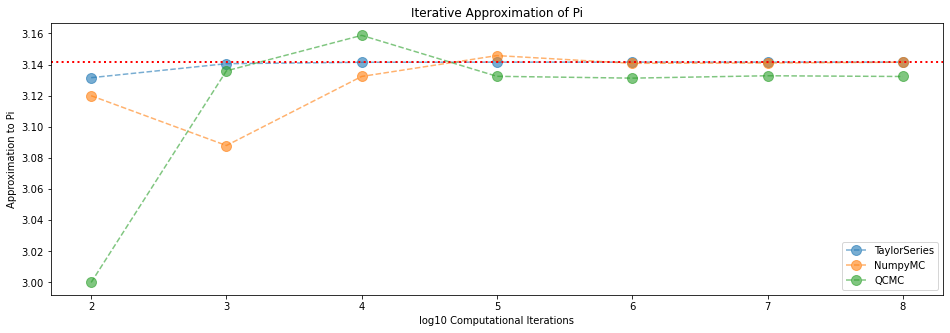

In [41]:
fig, ax0 = plt.subplots()

for algorithm in ['TaylorSeries', 'NumpyMC', 'QCMC']:
    (
        Performance_DataFrame
        .query(f"method == '{algorithm}'")
        .assign(log_pop = lambda x: np.log10(x['population']))
        .plot(
            x = 'log_pop',
            y = 'pi_approximatation',
            ax = ax0,
            alpha = 0.6,
            style = "o--",            
            markersize = 10,            
            xlabel = "log10 Computational Iterations",
            ylabel = "Approximation to Pi",
            title = "Iterative Approximation of Pi",
            figsize = (16, 5),
        )
    )
    
ax0.legend(['TaylorSeries', 'NumpyMC', 'QCMC'])
plt.axhline(
    y = np.pi,
    xmin = 0, xmax = Performance_DataFrame.population.max(),
    color = 'red',
    linewidth = 2,
    linestyle = 'dotted'
)

#### 5.4 Plot $log_{10}$(Durations) vs. $\pi$ Approximation Error

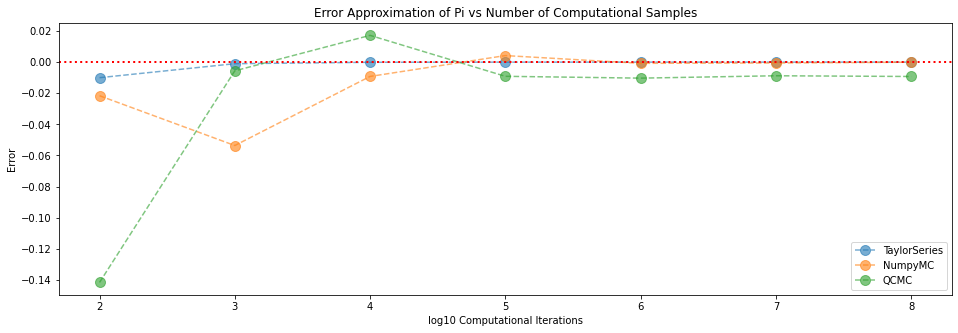

In [46]:
fig, ax0 = plt.subplots()

for algorithm in ['TaylorSeries', 'NumpyMC', 'QCMC']:
    (
        Performance_DataFrame
        .query(f"method == '{algorithm}'")
        .assign(log_pop = lambda x: np.log10(x['population']))
        .plot(
            x = 'log_pop',
            y = 'error',
            ax = ax0,
            alpha = 0.6,
            style = "o--",
            markersize = 10,            
            xlabel = "log10 Computational Iterations",
            ylabel = "Error",
            title = "Error Approximation of Pi vs Number of Computational Samples",
            figsize = (16, 5),
        )
    )
    
ax0.legend(['TaylorSeries', 'NumpyMC', 'QCMC'])
plt.axhline(
    y = 0,
    xmin = 0, xmax = Performance_DataFrame.population.max(),
    color = 'red',
    linewidth = 2,
    linestyle = 'dotted'
)

#### 5.5 Plot $log_{10}$(Durations) vs. $\pi$ Approximation Error

C:\Users\ngujral\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ngujral\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


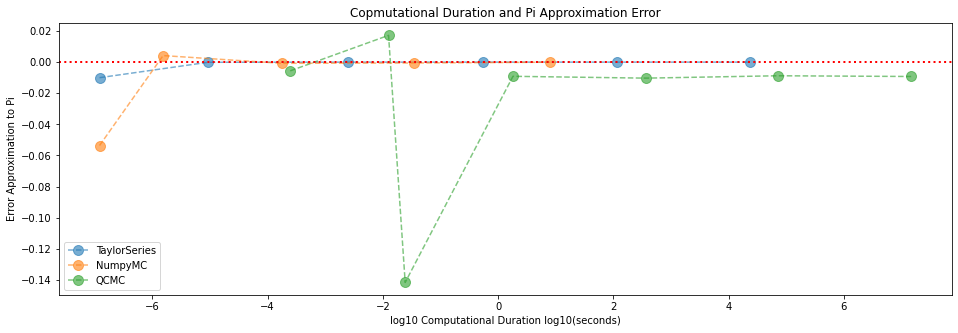

In [48]:
fig, ax0 = plt.subplots()

for algorithm in ['TaylorSeries', 'NumpyMC', 'QCMC']:
    (
        Performance_DataFrame
        .query(f"method == '{algorithm}'")
        .assign(
            log_pop = lambda x: np.log10(x['population']),
            log_duration = lambda x: np.log(x['duration'])
        )
        .sort_values('log_duration')
        .plot(
            x = 'log_duration',
            y = 'error',
            ax = ax0,
            alpha = 0.6,
            style = "o--",            
            markersize = 10,
            xlabel = "log10 Computational Duration log10(seconds)",
            ylabel = "Error Approximation to Pi",
            title = "Copmutational Duration and Pi Approximation Error",
            figsize = (16, 5),
        )
    )
    
ax0.legend(['TaylorSeries', 'NumpyMC', 'QCMC'])
plt.axhline(
    y = 0,
    xmin = 0, xmax = Performance_DataFrame.population.max(),
    color = 'red',
    linewidth = 2,
    linestyle = 'dotted'
)

#### 5.6 Plot  $\pi$ Approximation Error vs. $Log_{10}$(Population)

C:\Users\ngujral\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ngujral\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


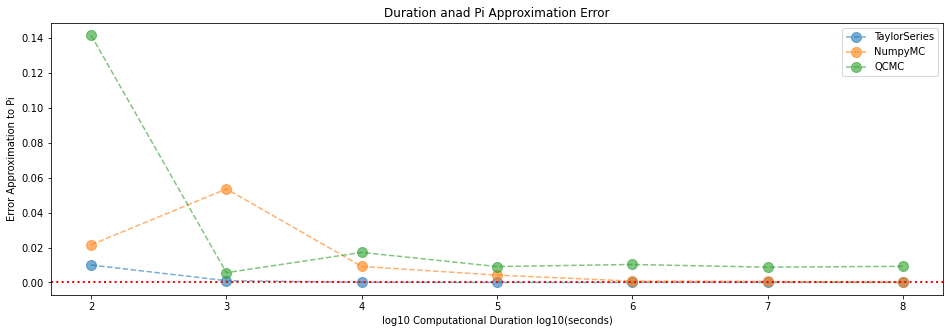

In [50]:
fig, ax0 = plt.subplots()

for algorithm in ['TaylorSeries', 'NumpyMC', 'QCMC']:
    (
        Performance_DataFrame
        .query(f"method == '{algorithm}'")
        .assign(
            log_pop = lambda x: np.log10(x['population']),
            log_duration = lambda x: np.log(x['duration']),
            abs_error = lambda x: abs(x['error'])
        )
        .sort_values('log_pop')
        .plot(
            x = 'log_pop',
            y = 'abs_error',
            ax = ax0,
            alpha = 0.6,
            style = "o--",            
            markersize = 10,
            xlabel = "log10 Computational Duration log10(seconds)",
            ylabel = "Error Approximation to Pi",
            title = "Duration anad Pi Approximation Error",
            figsize = (16, 5),
        )
    )
    
ax0.legend(['TaylorSeries', 'NumpyMC', 'QCMC'])
plt.axhline(
    y = 0,
    xmin = 0, xmax = Performance_DataFrame.population.max(),
    color = 'red',
    linewidth = 2,
    linestyle = 'dotted'
)

#### 5.7 Measure Corrilation between Pi Approximation Error and Sample Size

In [51]:
for algorithm in ['TaylorSeries', 'NumpyMC', 'QCMC']:
    display(
        f"Algorithm: {algorithm}",
        (
            Performance_DataFrame
            .query(
                f"method == '{algorithm}'"
            )
            .assign(
                log_pop = lambda x: np.log10(x['population']),
                log_duration = lambda x: np.log(x['duration']),
                abs_error = lambda x: abs(x['error'])
            )        
            [['population', 'abs_error']]
            .corr()
        )
    )

C:\Users\ngujral\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


'Algorithm: TaylorSeries'

,population,abs_error
population,1.000000,-0.211531
abs_error,-0.211531,1.000000


C:\Users\ngujral\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


'Algorithm: NumpyMC'

,population,abs_error
population,1.000000,-0.324342
abs_error,-0.324342,1.000000


'Algorithm: QCMC'

,population,abs_error
population,1.000000,-0.195622
abs_error,-0.195622,1.000000


### 6. Conclusion

<br>

#### Bottom Line Up Front (BLUF):

Ranking the various algorithms by speed and accuracy:

1. TaylorSeries
2. NumpyMC
3. QCMC

#### Analysis:

The series method of approxiamting $\pi$ only requires one algorithmicaly generated list with which to perform computations. In constrast each of the _Monte Carlo Approximation_ methods requires two of the aforementioned algorithmicaly generated lists and should therefore be expected, and proven, to be less effecient that the aformentioned _Taylor Series Expansion_ method. 

Between the two various of the Monte Carlo Approximation method, the Numpy utilzation method perofrmed faster and more accurately for population sizes greater than $10^{2}$ as compared to the Quantum Computing method. Incidently hte corrilation between population size and absolute value of the Approximation Error are indeed negtively corrilated with various degrees of strength listed below:

<br>

| Method       | Corrilation |
|--------------|-------------|
| TaylorSeries | -0.211531   |
| NumpyMC      | -0.324324   |
| QCMC         | -0.195622   | 